# Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


sns.set()


In [2]:
# Importing data set
lead = pd.read_csv(r'C:\Users\AnkitGupta\PYTHON\UPGRAD\Machine Learning\Lead+Scoring+Case+Study\Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [3]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
# let's look at the statistical aspects of the dataframe
lead.describe([.25,.50,.75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

# Step 3: Data Preparation

In [6]:
lead['Lead Origin'].value_counts()
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
blog                    1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

### Checking the columns, with value Select Present in it

In [7]:
lead[lead.isin(['Select']).any(1)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.00,...,No,Select,Other Metro Cities,02.Medium,02.Medium,15.0,14.0,No,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,...,No,Select,Thane & Outskirts,02.Medium,01.High,14.0,17.0,No,Yes,Page Visited on Website
12,8bf76a52-2478-476b-8618-1688e07874ad,660562,API,Organic Search,No,No,1,11.0,1538,11.00,...,No,Potential Lead,Select,01.High,02.Medium,16.0,16.0,No,No,Modified
13,88867067-3750-4753-8d33-1c7d1db53b5e,660558,Landing Page Submission,Organic Search,No,No,0,5.0,170,5.00,...,No,Select,Thane & Outskirts,02.Medium,01.High,14.0,17.0,No,Yes,Email Opened
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.00,...,No,Select,Select,01.High,01.High,16.0,17.0,No,No,Email Bounced


### Replacing the Select value with Nan

In [8]:
lead=lead.replace('Select', np.nan)

### Checking the null value percentage in each column

In [9]:
100 * (lead.isnull().sum(axis=0)/len(lead))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Dropping uneccessary columns from the data frame

In [10]:
drop_col = ['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
lead.drop(drop_col,axis = 1,inplace = True)

### Dropping derived columns from the data frame

In [11]:
derived_col = ['Last Activity','Tags']
lead.drop(derived_col,axis = 1,inplace = True)

### Checking the column details like datatype, column name and total number of variable to check the null value present in the data frame 

In [12]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 

### Finding out the columns which are skewed in the data frame

In [13]:
print(lead['Lead Origin'].value_counts())
print(lead['Lead Source'].value_counts()) # Create Other Categories for all small values

print(lead['Country'].value_counts()) # Drop Column as data is skewed
print(lead['Specialization'].value_counts())
print(lead['What is your current occupation'].value_counts())
print(lead['What matters most to you in choosing a course'].value_counts()) # Drop Column as data is skewed

print(lead['Magazine'].value_counts())
print(lead['Newspaper Article'].value_counts())
print(lead['X Education Forums'].value_counts())
print(lead['Newspaper'].value_counts())
print(lead['Digital Advertisement'].value_counts())
print(lead['Receive More Updates About Our Courses'].value_counts())



Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
blog                    1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     1

### As we can see that in the lead source two sources have different spelling but same meaning(i.e. google and Google), therefore merging the same 

In [14]:
lead['Lead Source'] = lead['Lead Source'].apply(lambda x:'Google' if x=='google' else x)

In [15]:
others = ['bing','Click2call','Live Chat','Social Media','Press_Release','welearnblog_Home','Pay per Click Ads','youtubechannel','WeLearn','NC_EDM','testone','blog']
lead['Lead Source'] = lead['Lead Source'].apply(lambda x:'Others' if x in others else x)

### Dropping the Skewed Columns

In [16]:
lead.drop('Country',axis=1,inplace = True)
lead.drop('What matters most to you in choosing a course',axis=1,inplace = True)
lead.drop('Magazine',axis=1,inplace = True)
lead.drop('Newspaper Article',axis=1,inplace = True)
lead.drop('X Education Forums',axis=1,inplace = True)
lead.drop('Newspaper',axis=1,inplace = True)
lead.drop('Digital Advertisement',axis=1,inplace = True)
lead.drop('Receive More Updates About Our Courses',axis=1,inplace = True)

### Getting the columns details to check the null values

In [17]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9204 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9103 non-null float64
Specialization                              5860 non-null object
What is your current occupation             6550 non-null object
Search                                      9240 non-null object
Through Recommendations                     9240 

In [18]:
# Getting the max null values in a row of the data frame
100 * (len(lead[lead.isnull().sum(axis=1) > 3].index)/ len(lead.index))

0.6168831168831169

In [19]:
# Removing the rows with max null values present  
lead = lead[lead.isnull().sum(axis=1) < 4]

In [20]:
# Getting column details to check the null values and data type of the columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9183 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                                 9183 non-null object
Lead Number                                 9183 non-null int64
Lead Origin                                 9183 non-null object
Lead Source                                 9153 non-null object
Do Not Email                                9183 non-null object
Do Not Call                                 9183 non-null object
Converted                                   9183 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9183 non-null int64
Page Views Per Visit                        9103 non-null float64
Specialization                              5860 non-null object
What is your current occupation             6500 non-null object
Search                                      9183 non-null object
Through Recommendations                     9183 

### Imputing the discrete data with mode

In [21]:
# Imputing the mode in place of the null values
lead['Lead Source'].fillna(lead['Lead Source'].mode()[0],inplace = True)

In [22]:
# Imputing the mode in place of the null values
lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0],inplace = True)

### Checking statistical part of the data from, inorder to decide the impute value (mean/median)

In [23]:
lead.describe([.25,.50,.75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9183.00000,9183.000000,9183.000000,9183.000000,9103.000000
mean,617130.59926,0.383099,3.415224,484.475444,2.362820
std,23389.71302,0.486169,4.844250,546.543895,2.161418
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596446.50000,0.000000,1.000000,11.000000,1.000000
50%,615429.00000,0.000000,3.000000,247.000000,2.000000
75%,637285.00000,1.000000,5.000000,929.000000,3.000000
99%,659569.70000,1.000000,17.000000,1840.180000,9.000000
max,660737.00000,1.000000,251.000000,2272.000000,55.000000


### From the above we can see that there is a huge difference between the Max value, 99% and 75%, therefore we cannot impute the value with mean, hence we have to go with median 

In [24]:
#lead['TotalVisits'].fillna(lead['TotalVisits'].median(),inplace = True)
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(),inplace = True)

In [25]:
# Imputing with Other in order 
lead['Specialization'].fillna('Others', inplace = True)

In [26]:
lead['Specialization'].value_counts()

Others                               3323
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# Imputing with mode, for the categorical data
lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0],inplace = True)
lead['What is your current occupation'].value_counts()

Unemployed              8234
Working Professional     705
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Imputing with mode, for the categorical data
lead['City'].fillna(lead['City'].mode()[0],inplace = True)
lead['City'].value_counts()

Mumbai                         6837
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     455
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9183 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                                 9183 non-null object
Lead Number                                 9183 non-null int64
Lead Origin                                 9183 non-null object
Lead Source                                 9183 non-null object
Do Not Email                                9183 non-null object
Do Not Call                                 9183 non-null object
Converted                                   9183 non-null int64
TotalVisits                                 9183 non-null float64
Total Time Spent on Website                 9183 non-null int64
Page Views Per Visit                        9183 non-null float64
Specialization                              9183 non-null object
What is your current occupation             9183 non-null object
Search                                      9183 non-null object
Through Recommendations                     9183 

### All the null values are now treated and now out next step is EDA

# Step 4: EDA

In [30]:
# Checking the total convert percentage in the data frame
cnvrt = (sum(lead['Converted'])/len(lead['Converted'].index))*100
cnvrt

38.3099205052815

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

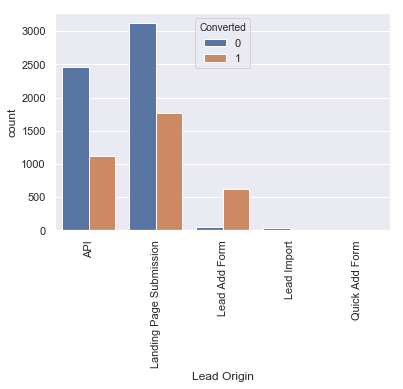

In [31]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead,)
plt.xticks(rotation = 90)

### Inference
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

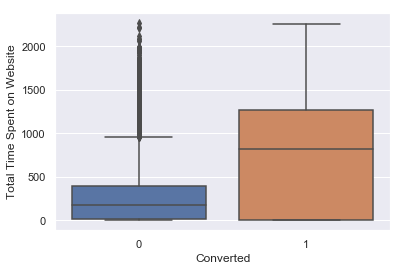

In [32]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)

### Inference
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

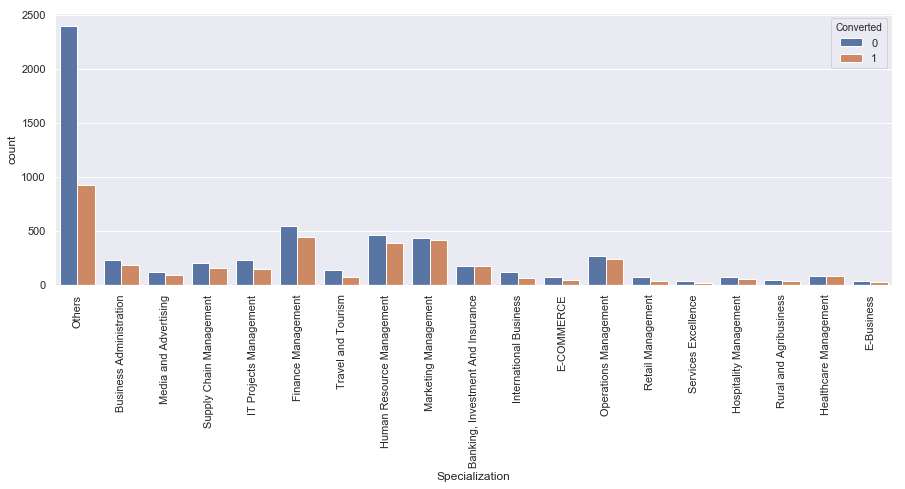

In [33]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

### Inference
Focus should be more on the Specialization with high conversion rate.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

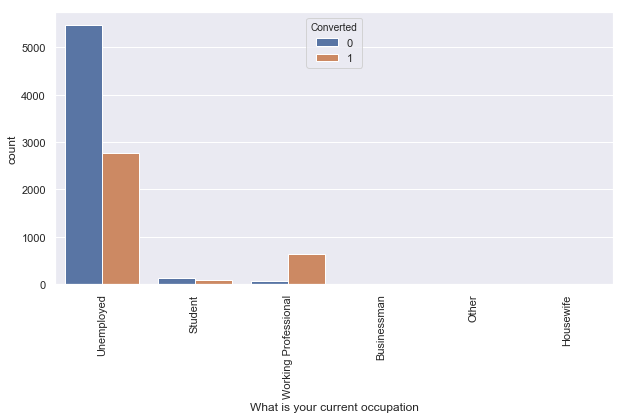

In [34]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

### Inference
Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

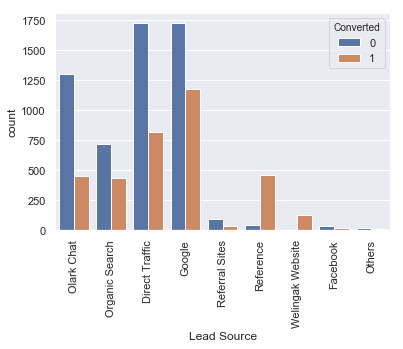

In [35]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead,)
plt.xticks(rotation = 90)

#### Inference
 Leads who's originated from Google, Directly on site, Olark Chat or by referal are converted more often

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

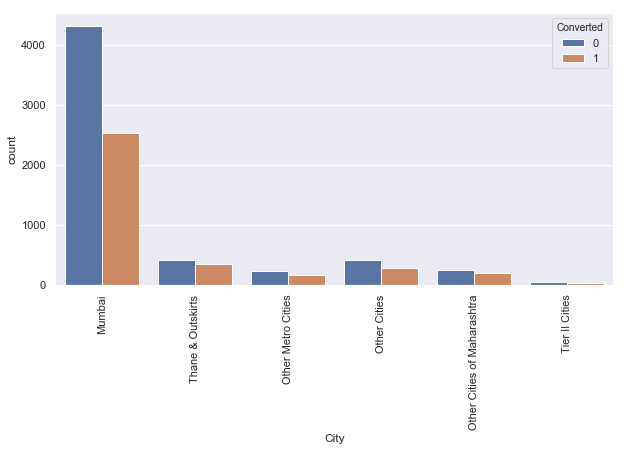

In [36]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

### Inference
Most leads are from mumbai with around 30% conversion rate.

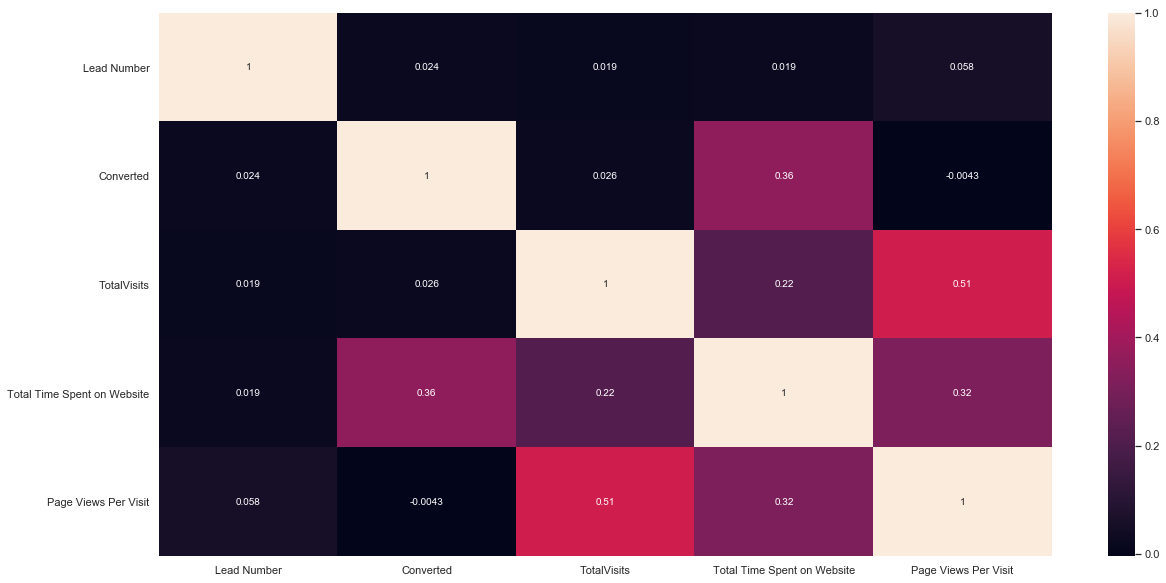

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead.corr(),annot = True)
plt.show()

#### Inference
- Leads who spend more time on the web site tend to get converted more
- if total visit increases on the website then the conversion rate will also increase
- If a lead has visited max pages on the web-site therefore he/she will have a better chance of getting converted

## Outliers

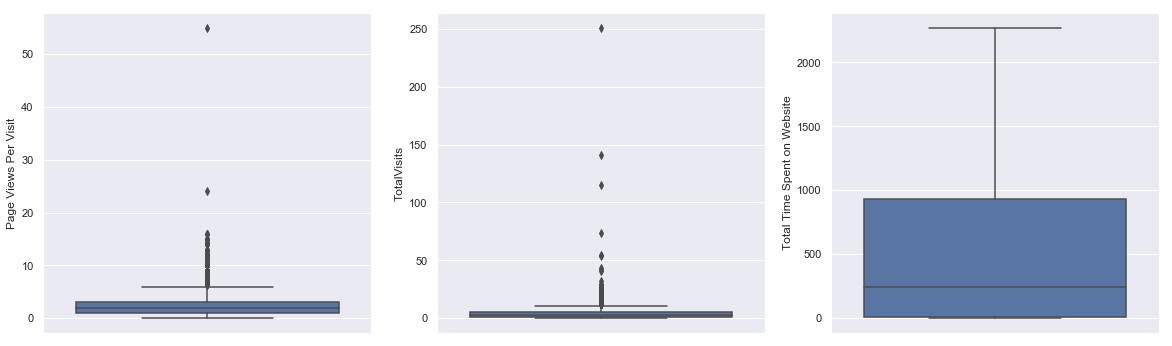

In [38]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(lead['Page Views Per Visit'],orient = 'v')
plt.subplot(3,3,2)
sns.boxplot(lead['TotalVisits'],orient = 'v')
plt.subplot(3,3,3)
sns.boxplot(lead['Total Time Spent on Website'],orient = 'v')

In [39]:
# Capping the value for page per vist because it will hamper our model
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


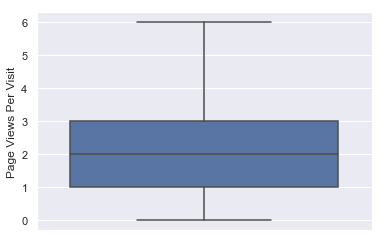

In [40]:
sns.boxplot(lead['Page Views Per Visit'],orient = 'v')

# Step 5: Data Preparation for Modelling

### Mapping the data from Yes/No to 0/1

In [41]:
# List of variables to map

var_col =  ['Do Not Email', 'Do Not Call','Search','Through Recommendations','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def bin(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[var_col] = lead[var_col].apply(bin)

In [42]:
# Getting column details
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9183 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                                 9183 non-null object
Lead Number                                 9183 non-null int64
Lead Origin                                 9183 non-null object
Lead Source                                 9183 non-null object
Do Not Email                                9183 non-null int64
Do Not Call                                 9183 non-null int64
Converted                                   9183 non-null int64
TotalVisits                                 9183 non-null float64
Total Time Spent on Website                 9183 non-null int64
Page Views Per Visit                        9183 non-null float64
Specialization                              9183 non-null object
What is your current occupation             9183 non-null object
Search                                      9183 non-null int64
Through Recommendations                     9183 non

## Creating dummy variables

In [43]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummies = pd.get_dummies(lead.drop('Prospect ID', axis=1), drop_first=True)
dummies.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Update me on Supply Chain Content,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# Adding the results to the master dataframe
lead_dum = pd.concat([lead['Prospect ID'], dummies], axis=1)
lead_dum.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Creating ffeature variable X

In [45]:
# Putting feature variable to X
X = lead_dum.drop(['Prospect ID','Converted','Lead Number'], axis=1)

In [46]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Creating response variable Y

In [47]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting data into train and test

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3568,1,0,-0.507047,-0.461356,-0.701251,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8060,0,0,-0.717162,-0.886609,-1.261105,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1856,0,0,0.333412,1.637534,1.538165,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1777,0,0,-0.296932,-0.109107,-0.701251,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3029,0,0,-0.717162,-0.886609,-1.261105,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Creating Logistic Regression Using GLM

In [50]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.7
Date:                Mon, 07 Sep 2020   Deviance:                       5877.4
Time:                        21:46:46   Pearson chi2:                 7.56e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1445      0.974     -0.148      0.882      -2.053       1.764
Do Not Email                                            -1.3700      0.161     -8.487      0.000      -1.686      -1.054
Do Not Call                                             22.4504   9.93e+04      0.000      1.000   -1.95e+05    1.95e+05
TotalVisits                                              0.2310      0.055      4.236      0.000       0.124       0.338
Total Time Spent on Website                              1.0827      0.038     28.527      0.000       1.008       1.157
Page Views Per Visit                                    -0.0937      0.053     -1.760      0.078      -0.198       0.011
Search                                                  -0.7394      0.933     -0.793      0.428      -2.567       1.089
Through Recommendations                                  0.3782      1.162      0.326      0.745      -1.899       2.655
Update me on Supply Chain Content                    -3.547e-09   1.65e-05     -0.000      1.000   -3.24e-05    3.24e-05
Get updates on DM Content                              2.88e-09   1.23e-05      0.000      1.000   -2.41e-05    2.41e-05
I agree to pay the amount through cheque              -1.69e-09    4.6e-06     -0.000      1.000   -9.01e-06    9.01e-06
A free copy of Mastering The Interview                  -0.1891      0.102     -1.851      0.064      -0.389       0.011
Lead Origin_Landing Page Submission                     -0.6264      0.128     -4.883      0.000      -0.878      -0.375
Lead Origin_Lead Add Form                                5.7290      1.053      5.440      0.000       3.665       7.793
Lead Origin_Lead Import                                 21.0293   5.21e+04      0.000      1.000   -1.02e+05    1.02e+05
Lead Origin_Quick Add Form                            5.536e-10   1.38e-06      0.000      1.000    -2.7e-06     2.7e-06
Lead Source_Facebook                                   -20.7373   5.21e+04     -0.000      1.000   -1.02e+05    1.02e+05
Lead Source_Google                                       0.2003      0.107      1.871      0.061      -0.009       0.410
Lead Source_Olark Chat                                   1.0331      0.151      6.861      0.000       0.738       1.328
Lead Source_Organic Search                               0.2398      0.123      1.945      0.052      -0.002       0.481
Lead Source_Others                                       0.1407      0.692      0.203      0.839      -1.217       1.498
Lead Source_Reference                                   -1.8582      1.075     -1.729      0.084      -3.964       0.248
Lead Source_Referral Sites                              -0.2714      0.328     -0.829      0.407      -0.914       0.371
Lead Source_Weli

### Find out the best possible variable ussing RFE

In [51]:
regression = LogisticRegression()
rfe = RFE(regression, 25)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
print(len(list(zip(X_train.columns, rfe.support_, rfe.ranking_))))
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

51


[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Search', True, 1),
 ('Through Recommendations', False, 9),
 ('Update me on Supply Chain Content', False, 27),
 ('Get updates on DM Content', False, 26),
 ('I agree to pay the amount through cheque', False, 24),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 25),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 8),
 ('Specialization_E-Business

In [52]:
# Getting top 25 columns for the GLM model from our data frame
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Search',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Metro Cities'],
      dtype='object')

### Using the RFE created in order to get logistic model using GLM

In [53]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6402
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2946.1
Date:                Mon, 07 Sep 2020   Deviance:                       5892.3
Time:                        21:46:47   Pearson chi2:                 7.70e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2292      0.550      0.417      0.677      -0.848       1.306
Do Not Email                                            -1.3771      0.161     -8.567      0.000      -1.692      -1.062
Do Not Call                                             20.3018   3.35e+04      0.001      1.000   -6.57e+04    6.58e+04
TotalVisits                                              0.2014      0.050      4.059      0.000       0.104       0.299
Total Time Spent on Website                              1.0793      0.038     28.587      0.000       1.005       1.153
Search                                                  -0.7446      0.855     -0.871      0.384      -2.421       0.931
A free copy of Mastering The Interview                  -0.2546      0.085     -3.004      0.003      -0.421      -0.089
Lead Origin_Landing Page Submission                     -0.6855      0.125     -5.503      0.000      -0.930      -0.441
Lead Origin_Lead Add Form                                5.8463      1.051      5.562      0.000       3.786       7.906
Lead Origin_Lead Import                                  0.2443      0.474      0.515      0.606      -0.685       1.173
Lead Source_Olark Chat                                   0.9529      0.121      7.876      0.000       0.716       1.190
Lead Source_Organic Search                               0.0908      0.105      0.869      0.385      -0.114       0.296
Lead Source_Reference                                   -2.0620      1.068     -1.931      0.053      -4.155       0.031
Lead Source_Referral Sites                              -0.4499      0.316     -1.424      0.154      -1.069       0.169
Lead Source_Welingak Website                             1.1883      1.451      0.819      0.413      -1.656       4.032
Specialization_Healthcare Management                     0.2278      0.250      0.912      0.362      -0.262       0.717
Specialization_Hospitality Management                   -0.9080      0.317     -2.868      0.004      -1.528      -0.288
Specialization_Others                                   -1.0702      0.118     -9.064      0.000      -1.302      -0.839
Specialization_Retail Management                        -0.7186      0.328     -2.194      0.028      -1.361      -0.077
Specialization_Services Excellence                      -0.5322      0.621     -0.857      0.392      -1.750       0.685
Specialization_Travel and Tourism                       -0.4378      0.233     -1.876      0.061      -0.895       0.020
What is your current occupation_Housewife               22.3145   1.49e+04      0.001      0.999   -2.92e+04    2.93e+04
What is your current occupation_Student                 -0.2908      0.583     -0.499      0.618      -1.433       0.852
What is your cur

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Origin_Lead Add Form,20.36
11,Lead Source_Reference,15.98
22,What is your current occupation_Unemployed,12.69
6,Lead Origin_Landing Page Submission,8.07
13,Lead Source_Welingak Website,5.06
16,Specialization_Others,4.83
9,Lead Source_Olark Chat,2.46
5,A free copy of Mastering The Interview,2.31
23,What is your current occupation_Working Profes...,1.84
21,What is your current occupation_Student,1.34


### From the above GLM we can see that 'Do Not Call' have very high p-value of 1, which means that this should be removed from the model

In [55]:
col=col.drop('Do Not Call')


In [56]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6403
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2946.3
Date:                Mon, 07 Sep 2020   Deviance:                       5892.7
Time:                        21:46:48   Pearson chi2:                 7.71e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2300      0.550      0.418      0.676      -0.847       1.307
Do Not Email                                            -1.3774      0.161     -8.568      0.000      -1.692      -1.062
TotalVisits                                              0.2017      0.050      4.065      0.000       0.104       0.299
Total Time Spent on Website                              1.0795      0.038     28.594      0.000       1.006       1.153
Search                                                  -0.7456      0.855     -0.872      0.383      -2.422       0.931
A free copy of Mastering The Interview                  -0.2549      0.085     -3.008      0.003      -0.421      -0.089
Lead Origin_Landing Page Submission                     -0.6874      0.125     -5.520      0.000      -0.931      -0.443
Lead Origin_Lead Add Form                                5.8463      1.051      5.562      0.000       3.786       7.906
Lead Origin_Lead Import                                  0.2433      0.474      0.513      0.608      -0.686       1.173
Lead Source_Olark Chat                                   0.9527      0.121      7.874      0.000       0.716       1.190
Lead Source_Organic Search                               0.0904      0.105      0.865      0.387      -0.114       0.295
Lead Source_Reference                                   -2.0597      1.068     -1.929      0.054      -4.152       0.033
Lead Source_Referral Sites                              -0.4505      0.316     -1.426      0.154      -1.070       0.169
Lead Source_Welingak Website                             1.1884      1.451      0.819      0.413      -1.656       4.033
Specialization_Healthcare Management                     0.2316      0.249      0.929      0.353      -0.257       0.720
Specialization_Hospitality Management                   -0.9085      0.317     -2.869      0.004      -1.529      -0.288
Specialization_Others                                   -1.0719      0.118     -9.080      0.000      -1.303      -0.840
Specialization_Retail Management                        -0.7188      0.328     -2.194      0.028      -1.361      -0.077
Specialization_Services Excellence                      -0.5324      0.621     -0.857      0.392      -1.750       0.685
Specialization_Travel and Tourism                       -0.4378      0.233     -1.876      0.061      -0.895       0.020
What is your current occupation_Housewife               22.3157   1.49e+04      0.001      0.999   -2.92e+04    2.93e+04
What is your current occupation_Student                 -0.2899      0.583     -0.497      0.619      -1.433       0.853
What is your current occupation_Unemployed              -0.4879      0.544     -0.897      0.370      -1.554       0.578
What is your cur

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Lead Add Form,20.36
10,Lead Source_Reference,15.98
21,What is your current occupation_Unemployed,12.67
5,Lead Origin_Landing Page Submission,8.06
12,Lead Source_Welingak Website,5.06
15,Specialization_Others,4.83
8,Lead Source_Olark Chat,2.46
4,A free copy of Mastering The Interview,2.31
22,What is your current occupation_Working Profes...,1.84
20,What is your current occupation_Student,1.34


### After dropping 'Do not call column, we can see that the second high p-value is of 'What is your current occupation_Housewife' more over the VIF is very low for the same, therefore we will drop this column from our model

In [58]:
col=col.drop('What is your current occupation_Housewife')

In [59]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6404
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.7
Date:                Mon, 07 Sep 2020   Deviance:                       5899.4
Time:                        21:46:49   Pearson chi2:                 7.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8239      0.509      1.619      0.105      -0.174       1.821
Do Not Email                                            -1.3809      0.161     -8.583      0.000      -1.696      -1.066
TotalVisits                                              0.1968      0.050      3.965      0.000       0.100       0.294
Total Time Spent on Website                              1.0786      0.038     28.587      0.000       1.005       1.153
Search                                                  -0.7413      0.854     -0.868      0.386      -2.416       0.933
A free copy of Mastering The Interview                  -0.2515      0.085     -2.970      0.003      -0.417      -0.086
Lead Origin_Landing Page Submission                     -0.6794      0.124     -5.460      0.000      -0.923      -0.436
Lead Origin_Lead Add Form                                5.8461      1.051      5.562      0.000       3.786       7.906
Lead Origin_Lead Import                                  0.2439      0.474      0.514      0.607      -0.685       1.173
Lead Source_Olark Chat                                   0.9501      0.121      7.853      0.000       0.713       1.187
Lead Source_Organic Search                               0.0947      0.104      0.907      0.364      -0.110       0.299
Lead Source_Reference                                   -2.0601      1.068     -1.929      0.054      -4.153       0.033
Lead Source_Referral Sites                              -0.4455      0.316     -1.411      0.158      -1.064       0.174
Lead Source_Welingak Website                             1.1872      1.451      0.818      0.413      -1.657       4.032
Specialization_Healthcare Management                     0.2401      0.248      0.967      0.333      -0.246       0.726
Specialization_Hospitality Management                   -0.9078      0.316     -2.868      0.004      -1.528      -0.288
Specialization_Others                                   -1.0672      0.118     -9.047      0.000      -1.298      -0.836
Specialization_Retail Management                        -0.7187      0.328     -2.194      0.028      -1.361      -0.077
Specialization_Services Excellence                      -0.5310      0.621     -0.855      0.393      -1.748       0.686
Specialization_Travel and Tourism                       -0.4383      0.233     -1.879      0.060      -0.895       0.019
What is your current occupation_Student                 -0.8908      0.543     -1.642      0.101      -1.954       0.173
What is your current occupation_Unemployed              -1.0885      0.500     -2.176      0.030      -2.069      -0.108
What is your current occupation_Working Professional     1.4754      0.529      2.791      0.005       0.439       2.511
City_Other Metro

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Lead Add Form,20.36
10,Lead Source_Reference,15.97
20,What is your current occupation_Unemployed,12.53
5,Lead Origin_Landing Page Submission,7.98
12,Lead Source_Welingak Website,5.06
15,Specialization_Others,4.80
8,Lead Source_Olark Chat,2.46
4,A free copy of Mastering The Interview,2.31
21,What is your current occupation_Working Profes...,1.83
19,What is your current occupation_Student,1.34


### After dropping the 'What is your current occupation_Housewife' column we can see that the P-value for the column 'What is your current occupation_Student' and What is your current occupation_Unemployeed has changed, this shows the coorelation between the 3 variables

### As the next highest p-value is of 'Lead Origin_Lead Import', therefore we will now be taking the variable out of the model

In [61]:
# col=col.drop('Specialization_Travel and Tourism')
col=col.drop('Lead Origin_Lead Import')

In [62]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.8
Date:                Mon, 07 Sep 2020   Deviance:                       5899.6
Time:                        21:46:51   Pearson chi2:                 7.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8322      0.509      1.636      0.102      -0.165       1.829
Do Not Email                                            -1.3810      0.161     -8.584      0.000      -1.696      -1.066
TotalVisits                                              0.1950      0.049      3.940      0.000       0.098       0.292
Total Time Spent on Website                              1.0774      0.038     28.622      0.000       1.004       1.151
Search                                                  -0.7380      0.854     -0.864      0.387      -2.412       0.936
A free copy of Mastering The Interview                  -0.2517      0.085     -2.973      0.003      -0.418      -0.086
Lead Origin_Landing Page Submission                     -0.6877      0.123     -5.571      0.000      -0.930      -0.446
Lead Origin_Lead Add Form                                5.8375      1.051      5.554      0.000       3.778       7.897
Lead Source_Olark Chat                                   0.9414      0.120      7.863      0.000       0.707       1.176
Lead Source_Organic Search                               0.0924      0.104      0.886      0.375      -0.112       0.297
Lead Source_Reference                                   -2.0616      1.068     -1.931      0.054      -4.154       0.031
Lead Source_Referral Sites                              -0.4488      0.316     -1.422      0.155      -1.067       0.170
Lead Source_Welingak Website                             1.1874      1.451      0.818      0.413      -1.657       4.032
Specialization_Healthcare Management                     0.2427      0.248      0.979      0.327      -0.243       0.729
Specialization_Hospitality Management                   -0.9058      0.317     -2.860      0.004      -1.526      -0.285
Specialization_Others                                   -1.0710      0.118     -9.090      0.000      -1.302      -0.840
Specialization_Retail Management                        -0.7189      0.327     -2.195      0.028      -1.361      -0.077
Specialization_Services Excellence                      -0.5315      0.621     -0.856      0.392      -1.749       0.686
Specialization_Travel and Tourism                       -0.4376      0.233     -1.877      0.061      -0.895       0.019
What is your current occupation_Student                 -0.8904      0.543     -1.641      0.101      -1.954       0.173
What is your current occupation_Unemployed              -1.0871      0.500     -2.173      0.030      -2.068      -0.107
What is your current occupation_Working Professional     1.4762      0.529      2.793      0.005       0.440       2.512
City_Other Metro Cities                                  0.1940      0.160      1.210      0.226      -0.120       0.508
================

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Lead Add Form,20.34
9,Lead Source_Reference,15.97
19,What is your current occupation_Unemployed,12.27
5,Lead Origin_Landing Page Submission,7.86
11,Lead Source_Welingak Website,5.06
14,Specialization_Others,4.79
7,Lead Source_Olark Chat,2.40
4,A free copy of Mastering The Interview,2.31
20,What is your current occupation_Working Profes...,1.81
18,What is your current occupation_Student,1.33


### After dropping the 'Lead Origin_Lead Import' we can see that the next variable with highest P-value is of 'Lead Source_Welingak Website', therefore we will be deleting the same

In [64]:
# col=col.drop('What is your current occupation_Student')
col=col.drop('Lead Source_Welingak Website')

In [65]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.1
Date:                Mon, 07 Sep 2020   Deviance:                       5900.3
Time:                        21:46:52   Pearson chi2:                 7.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8323      0.509      1.636      0.102      -0.165       1.829
Do Not Email                                            -1.3860      0.161     -8.608      0.000      -1.702      -1.070
TotalVisits                                              0.1950      0.049      3.939      0.000       0.098       0.292
Total Time Spent on Website                              1.0774      0.038     28.622      0.000       1.004       1.151
Search                                                  -0.7382      0.854     -0.864      0.387      -2.412       0.936
A free copy of Mastering The Interview                  -0.2517      0.085     -2.973      0.003      -0.418      -0.086
Lead Origin_Landing Page Submission                     -0.6874      0.123     -5.568      0.000      -0.929      -0.445
Lead Origin_Lead Add Form                                6.6035      0.726      9.099      0.000       5.181       8.026
Lead Source_Olark Chat                                   0.9415      0.120      7.863      0.000       0.707       1.176
Lead Source_Organic Search                               0.0924      0.104      0.887      0.375      -0.112       0.297
Lead Source_Reference                                   -2.8271      0.751     -3.765      0.000      -4.299      -1.356
Lead Source_Referral Sites                              -0.4489      0.316     -1.422      0.155      -1.068       0.170
Specialization_Healthcare Management                     0.2418      0.248      0.975      0.330      -0.244       0.728
Specialization_Hospitality Management                   -0.9057      0.317     -2.860      0.004      -1.526      -0.285
Specialization_Others                                   -1.0707      0.118     -9.086      0.000      -1.302      -0.840
Specialization_Retail Management                        -0.7188      0.328     -2.195      0.028      -1.361      -0.077
Specialization_Services Excellence                      -0.5303      0.621     -0.854      0.393      -1.748       0.687
Specialization_Travel and Tourism                       -0.4373      0.233     -1.875      0.061      -0.894       0.020
What is your current occupation_Student                 -0.8906      0.543     -1.641      0.101      -1.954       0.173
What is your current occupation_Unemployed              -1.0872      0.500     -2.173      0.030      -2.068      -0.107
What is your current occupation_Working Professional     1.4763      0.529      2.793      0.005       0.440       2.512
City_Other Metro Cities                                  0.1941      0.160      1.211      0.226      -0.120       0.508
========================================================================================================================
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,12.26
5,Lead Origin_Landing Page Submission,7.85
13,Specialization_Others,4.79
6,Lead Origin_Lead Add Form,4.45
9,Lead Source_Reference,4.24
7,Lead Source_Olark Chat,2.40
4,A free copy of Mastering The Interview,2.31
19,What is your current occupation_Working Profes...,1.81
17,What is your current occupation_Student,1.33
8,Lead Source_Organic Search,1.32


### After deleting the 'Lead Source_Welingak Website' we have noted that the p-value of Columns like Lead Source_Reference have decrease this shows multiple co-relation between the variable 

### After that we have seen that the next high p-value is of Specialization_Services Excellence, therefore we have removed it from our Model

In [67]:
col=col.drop('Specialization_Services Excellence')

In [68]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.5
Date:                Mon, 07 Sep 2020   Deviance:                       5901.0
Time:                        21:46:52   Pearson chi2:                 7.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8325      0.509      1.636      0.102      -0.165       1.830
Do Not Email                                            -1.3957      0.161     -8.687      0.000      -1.711      -1.081
TotalVisits                                              0.1947      0.050      3.933      0.000       0.098       0.292
Total Time Spent on Website                              1.0780      0.038     28.641      0.000       1.004       1.152
Search                                                  -0.7357      0.854     -0.861      0.389      -2.410       0.938
A free copy of Mastering The Interview                  -0.2514      0.085     -2.970      0.003      -0.417      -0.086
Lead Origin_Landing Page Submission                     -0.6870      0.123     -5.567      0.000      -0.929      -0.445
Lead Origin_Lead Add Form                                6.6061      0.726      9.102      0.000       5.184       8.029
Lead Source_Olark Chat                                   0.9409      0.120      7.859      0.000       0.706       1.176
Lead Source_Organic Search                               0.0904      0.104      0.867      0.386      -0.114       0.295
Lead Source_Reference                                   -2.8303      0.751     -3.769      0.000      -4.302      -1.359
Lead Source_Referral Sites                              -0.4516      0.315     -1.432      0.152      -1.070       0.166
Specialization_Healthcare Management                     0.2452      0.248      0.988      0.323      -0.241       0.731
Specialization_Hospitality Management                   -0.9026      0.317     -2.850      0.004      -1.523      -0.282
Specialization_Others                                   -1.0673      0.118     -9.063      0.000      -1.298      -0.837
Specialization_Retail Management                        -0.7162      0.328     -2.186      0.029      -1.358      -0.074
Specialization_Travel and Tourism                       -0.4329      0.233     -1.857      0.063      -0.890       0.024
What is your current occupation_Student                 -0.8919      0.543     -1.644      0.100      -1.955       0.172
What is your current occupation_Unemployed              -1.0900      0.500     -2.179      0.029      -2.070      -0.110
What is your current occupation_Working Professional     1.4758      0.529      2.792      0.005       0.440       2.512
City_Other Metro Cities                                  0.1908      0.160      1.191      0.233      -0.123       0.505
========================================================================================================================
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,12.25
5,Lead Origin_Landing Page Submission,7.85
13,Specialization_Others,4.78
6,Lead Origin_Lead Add Form,4.45
9,Lead Source_Reference,4.24
7,Lead Source_Olark Chat,2.40
4,A free copy of Mastering The Interview,2.31
18,What is your current occupation_Working Profes...,1.81
16,What is your current occupation_Student,1.33
8,Lead Source_Organic Search,1.32


### After deleting Specialization_Services Excellence we have notice that the p-value of the Specialization_Healthcare Management and Specialization_Hospitality Management also got changed, which means that the former has multi colinearilty with the latter 

### After that we saw that the next high p-value is of the 'Search' column, therefore we have removed it from our model

In [70]:
col=col.drop('Search')

In [71]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6408
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.9
Date:                Mon, 07 Sep 2020   Deviance:                       5901.8
Time:                        21:46:53   Pearson chi2:                 7.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8375      0.509      1.647      0.100      -0.159       1.835
Do Not Email                                            -1.3939      0.161     -8.678      0.000      -1.709      -1.079
TotalVisits                                              0.1918      0.049      3.882      0.000       0.095       0.289
Total Time Spent on Website                              1.0773      0.038     28.631      0.000       1.004       1.151
A free copy of Mastering The Interview                  -0.2500      0.085     -2.954      0.003      -0.416      -0.084
Lead Origin_Landing Page Submission                     -0.6897      0.123     -5.593      0.000      -0.931      -0.448
Lead Origin_Lead Add Form                                6.6023      0.726      9.097      0.000       5.180       8.025
Lead Source_Olark Chat                                   0.9371      0.120      7.833      0.000       0.703       1.172
Lead Source_Organic Search                               0.0888      0.104      0.852      0.394      -0.115       0.293
Lead Source_Reference                                   -2.8303      0.751     -3.770      0.000      -4.302      -1.359
Lead Source_Referral Sites                              -0.4498      0.315     -1.427      0.154      -1.068       0.168
Specialization_Healthcare Management                     0.2360      0.248      0.952      0.341      -0.250       0.722
Specialization_Hospitality Management                   -0.9005      0.317     -2.844      0.004      -1.521      -0.280
Specialization_Others                                   -1.0686      0.118     -9.079      0.000      -1.299      -0.838
Specialization_Retail Management                        -0.7146      0.328     -2.181      0.029      -1.357      -0.073
Specialization_Travel and Tourism                       -0.4303      0.233     -1.846      0.065      -0.887       0.027
What is your current occupation_Student                 -0.8938      0.543     -1.648      0.099      -1.957       0.170
What is your current occupation_Unemployed              -1.0931      0.500     -2.185      0.029      -2.073      -0.113
What is your current occupation_Working Professional     1.4725      0.529      2.786      0.005       0.437       2.508
City_Other Metro Cities                                  0.1859      0.160      1.161      0.245      -0.128       0.500
========================================================================================================================
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,12.25
4,Lead Origin_Landing Page Submission,7.85
12,Specialization_Others,4.78
5,Lead Origin_Lead Add Form,4.45
8,Lead Source_Reference,4.24
6,Lead Source_Olark Chat,2.40
3,A free copy of Mastering The Interview,2.30
17,What is your current occupation_Working Profes...,1.81
15,What is your current occupation_Student,1.33
7,Lead Source_Organic Search,1.32


### Removing the column with highest p-value

In [73]:
col=col.drop('Lead Source_Organic Search')

In [74]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6409
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.3
Date:                Mon, 07 Sep 2020   Deviance:                       5902.5
Time:                        21:46:54   Pearson chi2:                 7.92e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8626      0.509      1.694      0.090      -0.136       1.861
Do Not Email                                            -1.3921      0.161     -8.671      0.000      -1.707      -1.077
TotalVisits                                              0.1995      0.049      4.111      0.000       0.104       0.295
Total Time Spent on Website                              1.0767      0.038     28.625      0.000       1.003       1.150
A free copy of Mastering The Interview                  -0.2401      0.084     -2.865      0.004      -0.404      -0.076
Lead Origin_Landing Page Submission                     -0.7037      0.122     -5.758      0.000      -0.943      -0.464
Lead Origin_Lead Add Form                                6.5830      0.725      9.075      0.000       5.161       8.005
Lead Source_Olark Chat                                   0.9182      0.117      7.818      0.000       0.688       1.148
Lead Source_Reference                                   -2.8276      0.751     -3.766      0.000      -4.299      -1.356
Lead Source_Referral Sites                              -0.4757      0.314     -1.516      0.130      -1.091       0.139
Specialization_Healthcare Management                     0.2475      0.248      0.999      0.318      -0.238       0.733
Specialization_Hospitality Management                   -0.8892      0.316     -2.813      0.005      -1.509      -0.270
Specialization_Others                                   -1.0612      0.117     -9.043      0.000      -1.291      -0.831
Specialization_Retail Management                        -0.7130      0.328     -2.176      0.030      -1.355      -0.071
Specialization_Travel and Tourism                       -0.4033      0.231     -1.748      0.081      -0.856       0.049
What is your current occupation_Student                 -0.9063      0.544     -1.667      0.096      -1.972       0.159
What is your current occupation_Unemployed              -1.1016      0.502     -2.196      0.028      -2.085      -0.118
What is your current occupation_Working Professional     1.4654      0.530      2.765      0.006       0.427       2.504
City_Other Metro Cities                                  0.1940      0.160      1.215      0.224      -0.119       0.507
========================================================================================================================
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,11.92
4,Lead Origin_Landing Page Submission,7.72
11,Specialization_Others,4.76
5,Lead Origin_Lead Add Form,4.41
7,Lead Source_Reference,4.24
6,Lead Source_Olark Chat,2.30
3,A free copy of Mastering The Interview,2.26
16,What is your current occupation_Working Profes...,1.77
14,What is your current occupation_Student,1.33
2,Total Time Spent on Website,1.28


In [76]:
col=col.drop('Specialization_Healthcare Management')

In [77]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.8
Date:                Mon, 07 Sep 2020   Deviance:                       5903.5
Time:                        21:46:54   Pearson chi2:                 7.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8894      0.508      1.751      0.080      -0.106       1.885
Do Not Email                                            -1.3899      0.160     -8.663      0.000      -1.704      -1.075
TotalVisits                                              0.1998      0.048      4.119      0.000       0.105       0.295
Total Time Spent on Website                              1.0766      0.038     28.622      0.000       1.003       1.150
A free copy of Mastering The Interview                  -0.2366      0.084     -2.825      0.005      -0.401      -0.072
Lead Origin_Landing Page Submission                     -0.7041      0.122     -5.764      0.000      -0.944      -0.465
Lead Origin_Lead Add Form                                6.5851      0.725      9.078      0.000       5.163       8.007
Lead Source_Olark Chat                                   0.9192      0.117      7.826      0.000       0.689       1.149
Lead Source_Reference                                   -2.8260      0.751     -3.764      0.000      -4.298      -1.355
Lead Source_Referral Sites                              -0.4781      0.314     -1.523      0.128      -1.093       0.137
Specialization_Hospitality Management                   -0.8967      0.316     -2.838      0.005      -1.516      -0.277
Specialization_Others                                   -1.0668      0.117     -9.104      0.000      -1.297      -0.837
Specialization_Retail Management                        -0.7198      0.328     -2.197      0.028      -1.362      -0.078
Specialization_Travel and Tourism                       -0.4112      0.231     -1.783      0.075      -0.863       0.041
What is your current occupation_Student                 -0.9228      0.543     -1.701      0.089      -1.986       0.141
What is your current occupation_Unemployed              -1.1235      0.500     -2.245      0.025      -2.104      -0.143
What is your current occupation_Working Professional     1.4447      0.529      2.732      0.006       0.408       2.481
City_Other Metro Cities                                  0.1986      0.160      1.245      0.213      -0.114       0.511
========================================================================================================================
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,11.90
4,Lead Origin_Landing Page Submission,7.72
10,Specialization_Others,4.75
5,Lead Origin_Lead Add Form,4.41
7,Lead Source_Reference,4.24
6,Lead Source_Olark Chat,2.30
3,A free copy of Mastering The Interview,2.26
15,What is your current occupation_Working Profes...,1.77
13,What is your current occupation_Student,1.33
2,Total Time Spent on Website,1.28


In [79]:
col=col.drop('City_Other Metro Cities')

In [80]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6411
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.5
Date:                Mon, 07 Sep 2020   Deviance:                       5905.0
Time:                        21:46:55   Pearson chi2:                 7.96e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8955      0.508      1.762      0.078      -0.101       1.892
Do Not Email                                            -1.3852      0.160     -8.640      0.000      -1.699      -1.071
TotalVisits                                              0.1987      0.048      4.100      0.000       0.104       0.294
Total Time Spent on Website                              1.0757      0.038     28.610      0.000       1.002       1.149
A free copy of Mastering The Interview                  -0.2258      0.083     -2.713      0.007      -0.389      -0.063
Lead Origin_Landing Page Submission                     -0.6995      0.122     -5.728      0.000      -0.939      -0.460
Lead Origin_Lead Add Form                                6.5821      0.725      9.075      0.000       5.161       8.004
Lead Source_Olark Chat                                   0.9180      0.117      7.818      0.000       0.688       1.148
Lead Source_Reference                                   -2.8248      0.751     -3.763      0.000      -4.296      -1.353
Lead Source_Referral Sites                              -0.4669      0.313     -1.490      0.136      -1.081       0.147
Specialization_Hospitality Management                   -0.8835      0.315     -2.802      0.005      -1.502      -0.265
Specialization_Others                                   -1.0706      0.117     -9.139      0.000      -1.300      -0.841
Specialization_Retail Management                        -0.7245      0.327     -2.214      0.027      -1.366      -0.083
Specialization_Travel and Tourism                       -0.3998      0.230     -1.737      0.082      -0.851       0.051
What is your current occupation_Student                 -0.9243      0.543     -1.703      0.089      -1.988       0.140
What is your current occupation_Unemployed              -1.1260      0.501     -2.248      0.025      -2.108      -0.144
What is your current occupation_Working Professional     1.4489      0.529      2.738      0.006       0.412       2.486
========================================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,11.89
4,Lead Origin_Landing Page Submission,7.71
10,Specialization_Others,4.75
5,Lead Origin_Lead Add Form,4.41
7,Lead Source_Reference,4.24
6,Lead Source_Olark Chat,2.30
3,A free copy of Mastering The Interview,2.24
15,What is your current occupation_Working Profes...,1.77
13,What is your current occupation_Student,1.33
2,Total Time Spent on Website,1.28


In [82]:
col=col.drop('Lead Source_Referral Sites')

In [83]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2953.7
Date:                Mon, 07 Sep 2020   Deviance:                       5907.4
Time:                        21:46:56   Pearson chi2:                 7.97e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8899      0.508      1.751      0.080      -0.106       1.886
Do Not Email                                            -1.3839      0.160     -8.636      0.000      -1.698      -1.070
TotalVisits                                              0.1930      0.049      3.975      0.000       0.098       0.288
Total Time Spent on Website                              1.0758      0.038     28.616      0.000       1.002       1.150
A free copy of Mastering The Interview                  -0.2277      0.083     -2.736      0.006      -0.391      -0.065
Lead Origin_Landing Page Submission                     -0.6864      0.122     -5.636      0.000      -0.925      -0.448
Lead Origin_Lead Add Form                                6.5986      0.725      9.098      0.000       5.177       8.020
Lead Source_Olark Chat                                   0.9344      0.117      7.980      0.000       0.705       1.164
Lead Source_Reference                                   -2.8280      0.751     -3.767      0.000      -4.299      -1.357
Specialization_Hospitality Management                   -0.8809      0.315     -2.795      0.005      -1.499      -0.263
Specialization_Others                                   -1.0789      0.117     -9.220      0.000      -1.308      -0.850
Specialization_Retail Management                        -0.7207      0.327     -2.203      0.028      -1.362      -0.079
Specialization_Travel and Tourism                       -0.3998      0.230     -1.735      0.083      -0.851       0.052
What is your current occupation_Student                 -0.9272      0.543     -1.708      0.088      -1.992       0.137
What is your current occupation_Unemployed              -1.1335      0.501     -2.263      0.024      -2.115      -0.152
What is your current occupation_Working Professional     1.4380      0.529      2.717      0.007       0.401       2.475
========================================================================================================================
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,11.83
4,Lead Origin_Landing Page Submission,7.67
9,Specialization_Others,4.74
5,Lead Origin_Lead Add Form,4.40
7,Lead Source_Reference,4.24
6,Lead Source_Olark Chat,2.27
3,A free copy of Mastering The Interview,2.24
14,What is your current occupation_Working Profes...,1.76
12,What is your current occupation_Student,1.33
2,Total Time Spent on Website,1.28


In [85]:
col=col.drop('What is your current occupation_Student')

In [86]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6413
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2955.2
Date:                Mon, 07 Sep 2020   Deviance:                       5910.4
Time:                        21:46:57   Pearson chi2:                 7.98e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1216      0.221      0.549      0.583      -0.313       0.556
Do Not Email                                            -1.3837      0.160     -8.650      0.000      -1.697      -1.070
TotalVisits                                              0.1962      0.048      4.049      0.000       0.101       0.291
Total Time Spent on Website                              1.0760      0.038     28.630      0.000       1.002       1.150
A free copy of Mastering The Interview                  -0.2285      0.083     -2.746      0.006      -0.392      -0.065
Lead Origin_Landing Page Submission                     -0.6958      0.122     -5.723      0.000      -0.934      -0.458
Lead Origin_Lead Add Form                                6.6008      0.725      9.101      0.000       5.179       8.022
Lead Source_Olark Chat                                   0.9333      0.117      7.972      0.000       0.704       1.163
Lead Source_Reference                                   -2.8342      0.751     -3.775      0.000      -4.306      -1.363
Specialization_Hospitality Management                   -0.8859      0.315     -2.813      0.005      -1.503      -0.269
Specialization_Others                                   -1.0902      0.117     -9.334      0.000      -1.319      -0.861
Specialization_Retail Management                        -0.7250      0.327     -2.217      0.027      -1.366      -0.084
Specialization_Travel and Tourism                       -0.4036      0.230     -1.751      0.080      -0.855       0.048
What is your current occupation_Unemployed              -0.3553      0.193     -1.841      0.066      -0.734       0.023
What is your current occupation_Working Professional     2.2149      0.259      8.552      0.000       1.707       2.722
========================================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.20
4,Lead Origin_Landing Page Submission,6.27
5,Lead Origin_Lead Add Form,4.37
7,Lead Source_Reference,4.19
9,Specialization_Others,3.96
3,A free copy of Mastering The Interview,2.23
6,Lead Source_Olark Chat,2.18
13,What is your current occupation_Working Profes...,1.59
2,Total Time Spent on Website,1.27
1,TotalVisits,1.19


In [88]:
col=col.drop('Specialization_Travel and Tourism')

In [89]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.8
Date:                Mon, 07 Sep 2020   Deviance:                       5913.6
Time:                        21:46:57   Pearson chi2:                 7.98e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1207      0.221      0.545      0.586      -0.313       0.555
Do Not Email                                            -1.3994      0.160     -8.763      0.000      -1.712      -1.086
TotalVisits                                              0.1927      0.048      3.979      0.000       0.098       0.288
Total Time Spent on Website                              1.0753      0.038     28.628      0.000       1.002       1.149
A free copy of Mastering The Interview                  -0.2369      0.083     -2.853      0.004      -0.400      -0.074
Lead Origin_Landing Page Submission                     -0.6969      0.122     -5.731      0.000      -0.935      -0.459
Lead Origin_Lead Add Form                                6.6026      0.725      9.102      0.000       5.181       8.024
Lead Source_Olark Chat                                   0.9306      0.117      7.951      0.000       0.701       1.160
Lead Source_Reference                                   -2.8353      0.751     -3.776      0.000      -4.307      -1.364
Specialization_Hospitality Management                   -0.8722      0.315     -2.769      0.006      -1.490      -0.255
Specialization_Others                                   -1.0831      0.117     -9.277      0.000      -1.312      -0.854
Specialization_Retail Management                        -0.7106      0.327     -2.173      0.030      -1.352      -0.070
What is your current occupation_Unemployed              -0.3612      0.193     -1.873      0.061      -0.739       0.017
What is your current occupation_Working Professional     2.2102      0.259      8.537      0.000       1.703       2.718
========================================================================================================================
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,9.18
4,Lead Origin_Landing Page Submission,6.27
5,Lead Origin_Lead Add Form,4.37
7,Lead Source_Reference,4.19
9,Specialization_Others,3.96
3,A free copy of Mastering The Interview,2.22
6,Lead Source_Olark Chat,2.18
12,What is your current occupation_Working Profes...,1.59
2,Total Time Spent on Website,1.27
1,TotalVisits,1.19


In [91]:
col=col.drop('What is your current occupation_Unemployed')

In [92]:
X_train_sm = sm.add_constant(X_train[col])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6428
Model:                            GLM   Df Residuals:                     6415
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2958.5
Date:                Mon, 07 Sep 2020   Deviance:                       5917.1
Time:                        21:46:58   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2316      0.116     -1.994      0.046      -0.459      -0.004
Do Not Email                                            -1.3987      0.160     -8.756      0.000      -1.712      -1.086
TotalVisits                                              0.1930      0.048      3.990      0.000       0.098       0.288
Total Time Spent on Website                              1.0763      0.038     28.658      0.000       1.003       1.150
A free copy of Mastering The Interview                  -0.2368      0.083     -2.853      0.004      -0.399      -0.074
Lead Origin_Landing Page Submission                     -0.6960      0.122     -5.721      0.000      -0.935      -0.458
Lead Origin_Lead Add Form                                6.5984      0.725      9.097      0.000       5.177       8.020
Lead Source_Olark Chat                                   0.9358      0.117      7.999      0.000       0.706       1.165
Lead Source_Reference                                   -2.8240      0.751     -3.762      0.000      -4.296      -1.353
Specialization_Hospitality Management                   -0.8762      0.316     -2.777      0.005      -1.495      -0.258
Specialization_Others                                   -1.0838      0.117     -9.276      0.000      -1.313      -0.855
Specialization_Retail Management                        -0.7155      0.327     -2.186      0.029      -1.357      -0.074
What is your current occupation_Working Professional     2.5614      0.179     14.325      0.000       2.211       2.912
========================================================================================================================
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,4.25
7,Lead Source_Reference,4.13
4,Lead Origin_Landing Page Submission,2.37
3,A free copy of Mastering The Interview,2.18
6,Lead Source_Olark Chat,1.94
9,Specialization_Others,1.80
2,Total Time Spent on Website,1.25
1,TotalVisits,1.19
11,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.10


### Now the p-value of all the variables is below 0.05 and also the VIF is less than 5, therefore we can go ahead and predict our train model

In [94]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01790608, 0.99338256, 0.96171705, 0.1838994 , 0.18659347,
       0.18659347, 0.8555262 , 0.10734219, 0.11962081, 0.68708864])

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.017906,3568
1,1,0.993383,8060
2,1,0.961717,1856
3,0,0.183899,1777
4,0,0.186593,3029


### Creating the final predicted value, using the cutt-off at 0.4, because this gives us max accuracy of 80%

In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.017906,3568,0
1,1,0.993383,8060,1
2,1,0.961717,1856,1
3,0,0.183899,1777,0
4,0,0.186593,3029,0


In [97]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3386  607]
 [ 659 1776]]


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8030491599253267


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7293634496919917

In [101]:
# Let us calculate specificity
TN / float(TN+FP)


0.8479839719509141

In [102]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1520160280490859


In [103]:
# positive predictive value 
print (TP / float(TP+FP))

0.7452790600083928


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8370828182941904


In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

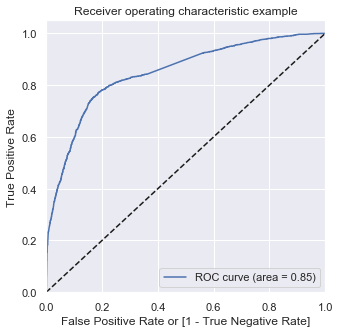

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.017906,3568,0,1,0,0,0,0,0,0,0,0,0
1,1,0.993383,8060,1,1,1,1,1,1,1,1,1,1,1
2,1,0.961717,1856,1,1,1,1,1,1,1,1,1,1,1
3,0,0.183899,1777,0,1,1,0,0,0,0,0,0,0,0
4,0,0.186593,3029,0,1,1,0,0,0,0,0,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378811  1.000000  0.000000
0.1   0.1  0.450218  0.991376  0.120210
0.2   0.2  0.734132  0.834497  0.672928
0.3   0.3  0.795271  0.774127  0.808164
0.4   0.4  0.803049  0.729363  0.847984
0.5   0.5  0.791381  0.639836  0.883797
0.6   0.6  0.775047  0.543737  0.916103
0.7   0.7  0.752800  0.432854  0.947909
0.8   0.8  0.727754  0.321561  0.975457
0.9   0.9  0.706129  0.239014  0.990984


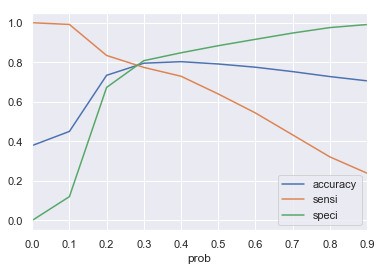

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the above graph we can see that the porbablility cutt off should be around 0.29.

### Fitting the test dataset

In [111]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

### Using the final columns list from the RFE, we will create the test data set 

In [112]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Specialization_Hospitality Management,Specialization_Others,Specialization_Retail Management,What is your current occupation_Working Professional
7809,0,-0.281961,-0.840208,0,0,0,0,0,0,1,0,0
8451,0,0.909454,2.071979,1,1,0,0,0,0,0,0,0
7953,0,0.115177,0.608522,1,1,0,0,0,0,0,0,0
496,0,0.313747,-0.641398,0,0,0,0,0,0,1,0,0
4236,0,-0.679100,-0.886228,0,0,0,1,0,0,1,0,0


### Creating predicted column using the X_test

In [113]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7809    0.093287
8451    0.775759
7953    0.380530
496     0.125079
4236    0.187774
6651    0.783922
5242    0.161204
8473    0.318591
297     0.111816
7436    0.187774
dtype: float64

In [114]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
7809,0.093287
8451,0.775759
7953,0.380530
496,0.125079
4236,0.187774


In [115]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [116]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [117]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [118]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7809,0,0.093287
1,8451,1,0.775759
2,7953,1,0.380530
3,496,0,0.125079
4,4236,0,0.187774


### Taking the cutt off of 0.29 from the curve 

In [119]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.29 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,7809,0,0.093287,0
1,8451,1,0.775759,1
2,7953,1,0.380530,1
3,496,0,0.125079,0
4,4236,0,0.187774,0


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7945553539019964

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1343,  329],
       [ 237,  846]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7811634349030471

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8032296650717703

In [125]:
X_test[col].shape

(2755, 12)

### Using Logistic Regression to generate the probabaility score

#### Running logistic regression on train

In [126]:
clf = LogisticRegression(random_state=0).fit(X_train[col], y_train)

In [127]:
# predicting the value
clf.predict(X_train[col])

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [128]:
# predicting the probability
clf.predict_proba(X_train[col])

array([[0.97974675, 0.02025325],
       [0.00698669, 0.99301331],
       [0.0423849 , 0.9576151 ],
       ...,
       [0.55161527, 0.44838473],
       [0.81296959, 0.18703041],
       [0.69038785, 0.30961215]])

In [129]:
# generate the score
clf.score(X_train[col], y_train)

0.7926260112009956

### Using the coeff on the test data set

In [130]:
clf.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [131]:
# predicting the probability
clf.predict_proba(X_test)

array([[0.90187539, 0.09812461],
       [0.22953736, 0.77046264],
       [0.61966764, 0.38033236],
       ...,
       [0.88767637, 0.11232363],
       [0.3363992 , 0.6636008 ],
       [0.72781723, 0.27218277]])

In [132]:
# generate the score
clf.score(X_test, y_test)

0.7782214156079855